# Explore here

### 1. Problem Statement and Data Collection

#### 1.1 The problem
We'll be analysing a dataset from a bank trying to determine if we can get meaningful data that would help us predict whether or not a client is likely to hire a long-term deposit. The variables in the dataset are described below:


`age` Age of customer (numeric)

`job` Type of job (categorical)

`marital` Marital status (categorical)

`education` Level of education (categorical)

`default` do you currently have credit (categorical) 6. housing.

`housing` do you have a housing loan (categorical) 7. loan.

`loan` Do you have a personal loan? (categorical)

`contact` Type of contact communication (categorical)

`month` Last month in which you have been contacted (categorical)

`day_of_week` Last day on which you have been contacted (categorical)

`duration` Duration of previous contact in seconds (numeric)

`campaign` Number of contacts made during this campaign to the customer (numeric)

`pdays` Number of days that elapsed since the last campaign until the customer was contacted (numeric)

`previous` Number of contacts made during the previous campaign to the customer (numeric)

`poutcome` Result of the previous marketing campaign (categorical).

`emp.var.rate` Employment variation rate. Quarterly indicator (numeric)

`cons.price.idx` Consumer price index. Monthly indicator (numeric)

`cons.conf.idx` Consumer confidence index. Monthly indicator (numeric)

`euribor3m` EURIBOR 3-month rate. Daily indicator (numeric)

`nr.employed` Number of employees. Quarterly indicator (numeric)

`y` TARGET. Whether the customer takes out a long-term deposit or not



In [202]:
# 1.2 Data Collection

import pandas as pd

# import dataset
total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv", sep=';')

total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### 2. Exploration and data cleaning

We'll try to understand the data and its main features.

In [203]:
# Obtain the dimensions of the dataset
total_data.shape

(41188, 21)

In [204]:
# Obtain information about data types and non-null values
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

It seems the dataset is very complete. It doesn't seem to have any nulls and given the columns we have, with no unique identifiers, it doesn't seem possible to tell if there are any genuine duplicates, so we'll skip searching for them.

In [205]:
total_data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Our dataset seems to be neat and clean, so let's move on to the next part:

### 3. Analysis of univariate variables
#### 3.1 Analysis on categorical variables
Let's plot the categorical variables in our dataset and see what they can show us.

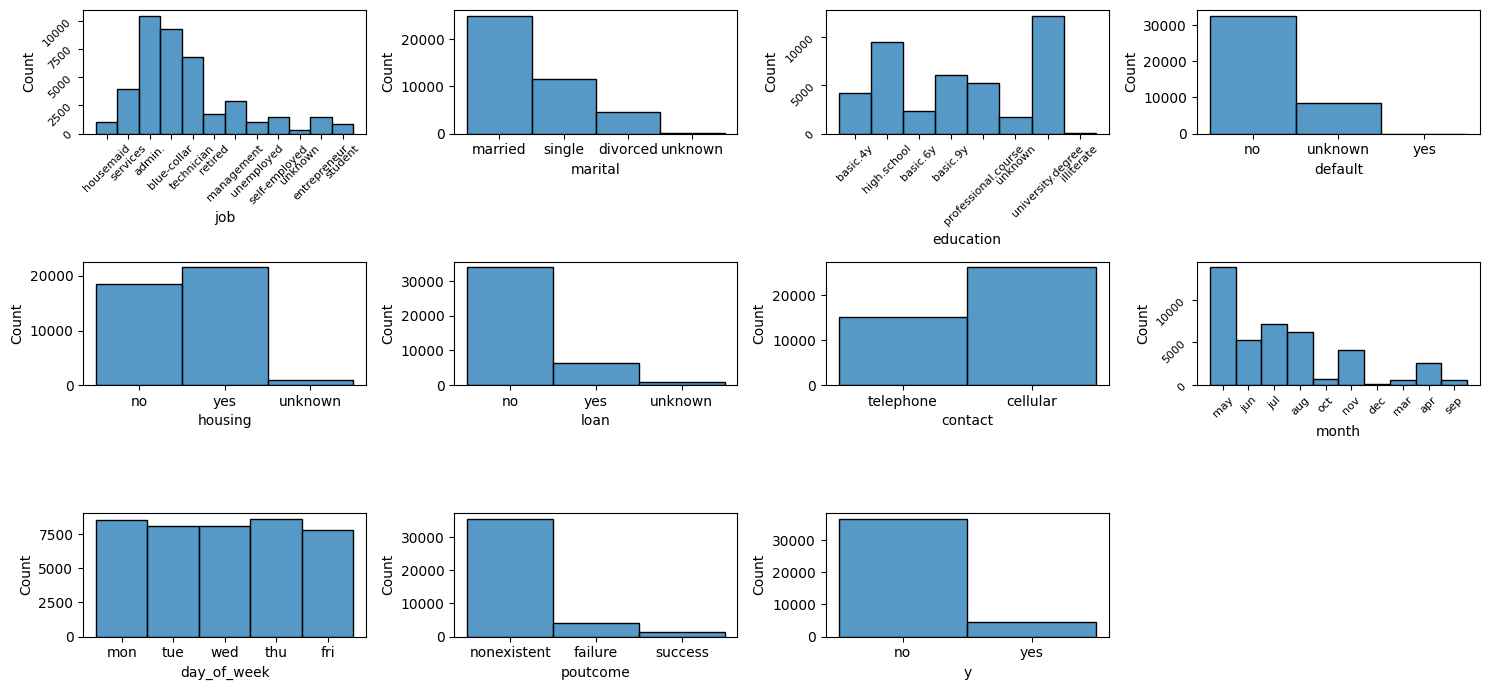

In [206]:
import matplotlib.pyplot as plt 
import seaborn as sns

fig, axs = plt.subplots(3, 4, figsize = (15, 7))
fig.delaxes(axs[2,3])

# Create a multiple histogram
sns.histplot(ax = axs[0,0], data = total_data, x = "job")
axs[0,0].tick_params(labelrotation=45, labelsize=8)
sns.histplot(ax = axs[0,1], data = total_data, x = "marital")
sns.histplot(ax = axs[0,2], data = total_data, x = "education")
axs[0,2].tick_params(labelrotation=45, labelsize=8)
sns.histplot(ax = axs[0,3], data = total_data, x = "default")
sns.histplot(ax = axs[1,0], data = total_data, x = "housing")
sns.histplot(ax = axs[1,1], data = total_data, x = "loan")
sns.histplot(ax = axs[1,2], data = total_data, x = "contact")
sns.histplot(ax = axs[1,3], data = total_data, x = "month")
axs[1,3].tick_params(labelrotation=45, labelsize=8)
sns.histplot(ax = axs[2,0], data = total_data, x = "day_of_week")
sns.histplot(ax = axs[2,1], data = total_data, x = "poutcome")
sns.histplot(ax = axs[2,2], data = total_data, x = "y")

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From here we can get several bits of information:

- For the big majority of clients, we don't have information about the `poutcome` variable, so we can most likely get rid of that variable.
- The daataset seems to have balanced data from all days of the week
- Most of the contacts were made during the summer
- Most contacts were made via cellular phone
- Most contacted clients don't have a loan hired
- Data is fairly distributed for the housing variable
- Almost all, if not all, of the contacted customers do not seem to have credit (although this variable might be interpreted as "has the client defaulted or not")
- The biggest population by education is college educated
- Most contacted clients are married
- The three main categories by far in the job variable are services, administrative and blue collar.
- Most of the clients don't end up hiring a long-term deposit

Knowing this, let's drop the `poutcome` column and take a deeper look at the `default` variable.

In [207]:
total_data.drop(['poutcome'], axis=1, inplace=True)

grouped_default = total_data.groupby(['default'])['job'].count()
grouped_default


default
no         32588
unknown     8597
yes            3
Name: job, dtype: int64

It seems the data in the `default` variable is not significatn enough to influence a decision, so we'll discard it

In [208]:
total_data.drop(['default'], axis=1, inplace=True)

#### 3.2 Analysis on numerical variables
Now let's plot the numerical variables. For this part lets focus on the columns that have a numeric data type in the dataframe.

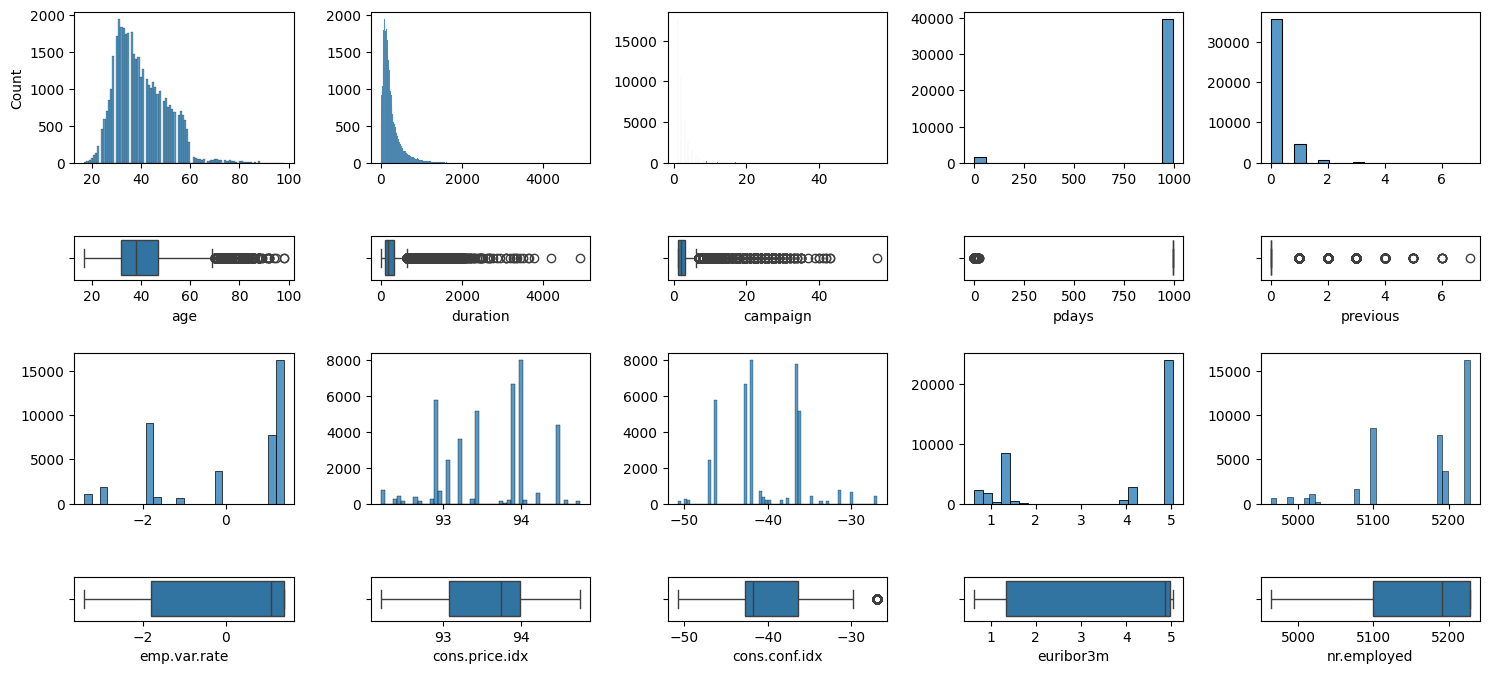

In [209]:
fig, axs = plt.subplots(4, 5, figsize = (15, 7))

# Creating a multiple figure with histograms and box plots
sns.histplot(ax = axs[0, 0], data = total_data, x = "age").set(xlabel = None)
sns.boxplot(ax = axs[1, 0], data = total_data, x = "age").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 1], data = total_data, x = "duration").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 1], data = total_data, x = "duration").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 2], data = total_data, x = "campaign").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 2], data = total_data, x = "campaign").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 3], data = total_data, x = "pdays").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 3], data = total_data, x = "pdays").set_box_aspect(0.2)

sns.histplot(ax = axs[0, 4], data = total_data, x = "previous").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[1, 4], data = total_data, x = "previous").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 0], data = total_data, x = "emp.var.rate").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 0], data = total_data, x = "emp.var.rate").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 1], data = total_data, x = "cons.price.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 1], data = total_data, x = "cons.price.idx").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 2], data = total_data, x = "cons.conf.idx").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 2], data = total_data, x = "cons.conf.idx").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 3], data = total_data, x = "euribor3m").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 3], data = total_data, x = "euribor3m").set_box_aspect(0.2)

sns.histplot(ax = axs[2, 4], data = total_data, x = "nr.employed").set(xlabel = None, ylabel = None)
sns.boxplot(ax = axs[3, 4], data = total_data, x = "nr.employed").set_box_aspect(0.2)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

From these graphs we can deduct the following intormation:
- The `age` follows a somewhat normal distribution with some outliers to the right that tilt it.
- There seems to be a strong mean in the `duration` and many outliers
- The `campaign` graph is not showing clear data, we might want to take a closer look
- The `pdays` data seems biased towards the value 1000, which doesn't make much sense under the definition we're given of said variable, we might want to discard it.
- Same as above for `previous`
- The rates and indexes variables seem to have fairly distributed data, which might make them useful for predictions
- The `euribor3m` seems to have a strong trend. Might be influenced by the fact that most contacts were made in may, we might want to look at this relationship.
- The nr.employed seems to follow the same trend.

Let's take a closer look at `campaign` and `pdays`

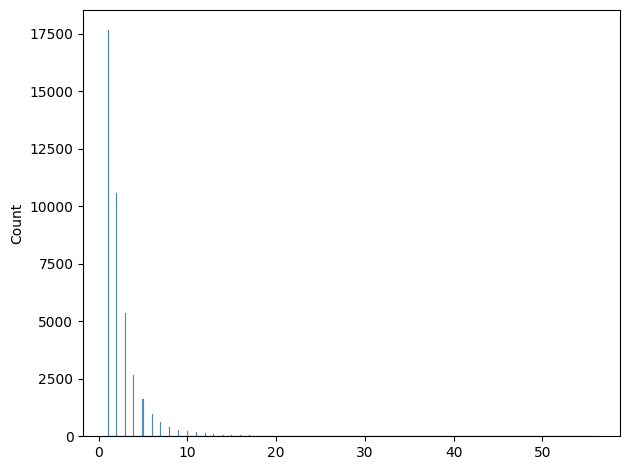

In [210]:
sns.histplot(data = total_data, x = "campaign").set(xlabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

There seems to be some data after all, so we'll keep `campaign`.

pdays
0         15
1         26
2         61
3        439
4        118
5         46
6        412
7         60
8         18
9         64
10        52
11        28
12        58
13        36
14        20
15        24
16        11
17         8
18         7
19         3
20         1
21         2
22         3
25         1
26         1
27         1
999    39673
Name: job, dtype: int64


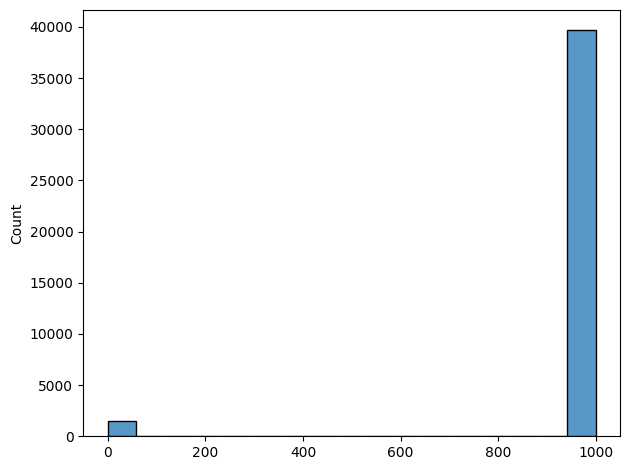

In [211]:
grouped_default = total_data.groupby(['pdays'])['job'].count()
print(grouped_default)

sns.histplot(data = total_data, x = "pdays").set(xlabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Almost all of the data fot `pdays` seems to be in the 999 value, which seems to be a default. Therefore, it's safe to assume that we can skip this column.

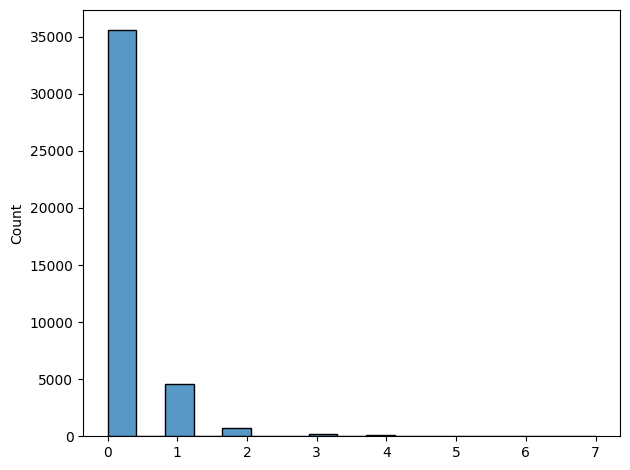

In [212]:
sns.histplot(data = total_data, x = "previous").set(xlabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Same with the ``previous`` column

In [213]:
total_data.drop(['pdays'], axis=1, inplace=True)
total_data.drop(['previous'], axis=1, inplace=True)
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   housing         41188 non-null  object 
 5   loan            41188 non-null  object 
 6   contact         41188 non-null  object 
 7   month           41188 non-null  object 
 8   day_of_week     41188 non-null  object 
 9   duration        41188 non-null  int64  
 10  campaign        41188 non-null  int64  
 11  emp.var.rate    41188 non-null  float64
 12  cons.price.idx  41188 non-null  float64
 13  cons.conf.idx   41188 non-null  float64
 14  euribor3m       41188 non-null  float64
 15  nr.employed     41188 non-null  float64
 16  y               41188 non-null  object 
dtypes: float64(5), int64(3), object

### 4. Analysis of multivariate variables
Now let's see how the variables relate to each other. 

#### 4.1 Numerical-Numerical
Let's start with the numerical variables.

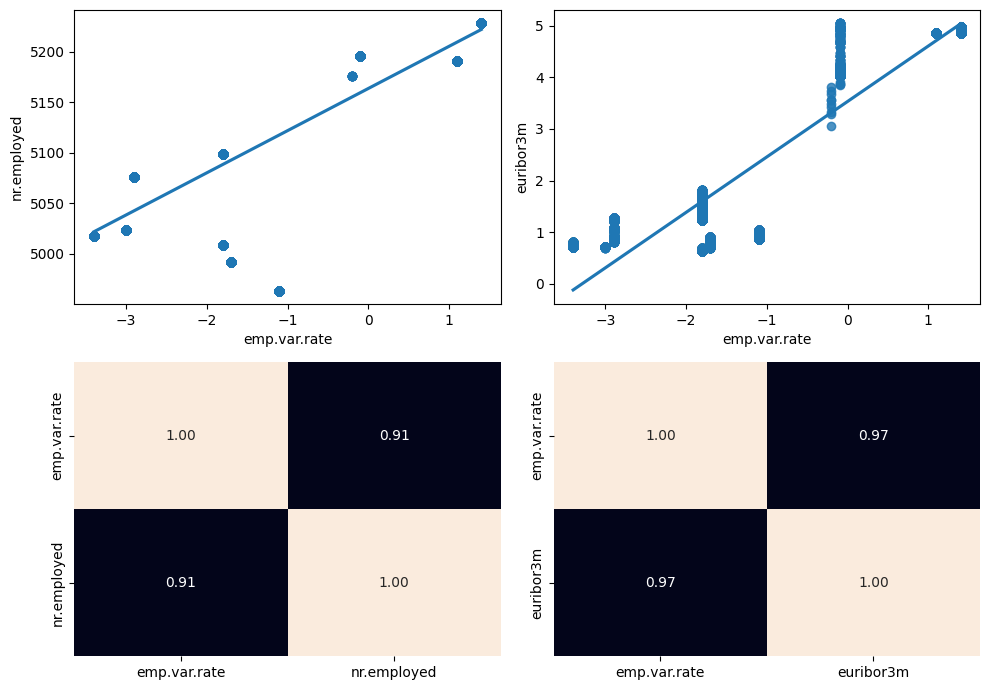

In [214]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Create a multiple scatter diagram
sns.regplot(ax = axis[0, 0], data = total_data, x = "emp.var.rate", y = "nr.employed")
sns.heatmap(total_data[["emp.var.rate", "nr.employed"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = total_data, x = "emp.var.rate", y = "euribor3m")
sns.heatmap(total_data[["emp.var.rate", "euribor3m"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

As suspected, the `emp.var.rate` is tightly related to the `nr.employed` and `euribor3m`. While the first relationship is easy to see, the second one not so much. Maybe it's related to the fact that lower EURIBOR indicators favor the bank.

#### 4.2 Categorical-categorical
Let's have a look on categorical variables and see what we can find out.

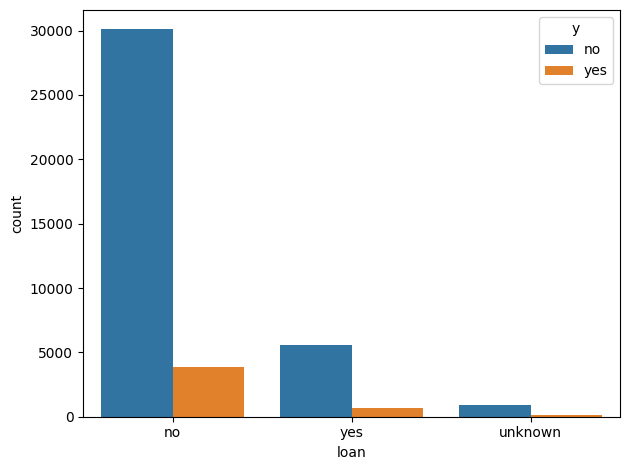

In [215]:
sns.countplot(data = total_data, x = "loan", hue = "y")

plt.tight_layout()

plt.show()

Loans and long-term loans remain proportional when compared, so they might not be related.

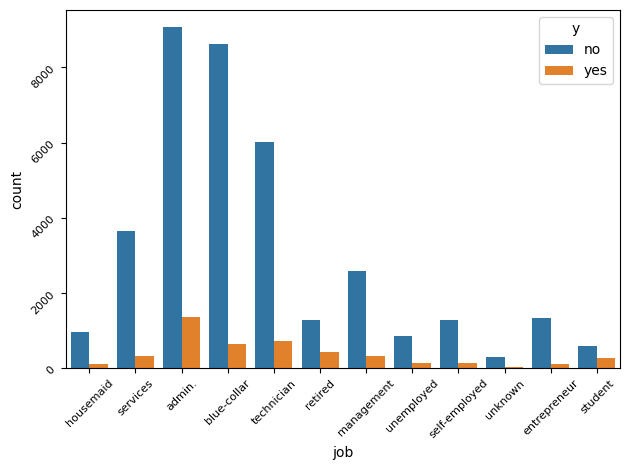

In [216]:
sns.countplot(data = total_data, x = "job", hue = "y")
plt.tick_params(labelrotation=45, labelsize=8)

plt.tight_layout()

plt.show()

The proportion also seems to remain mostly the same across different jobs, but it's hard to tell for sure.

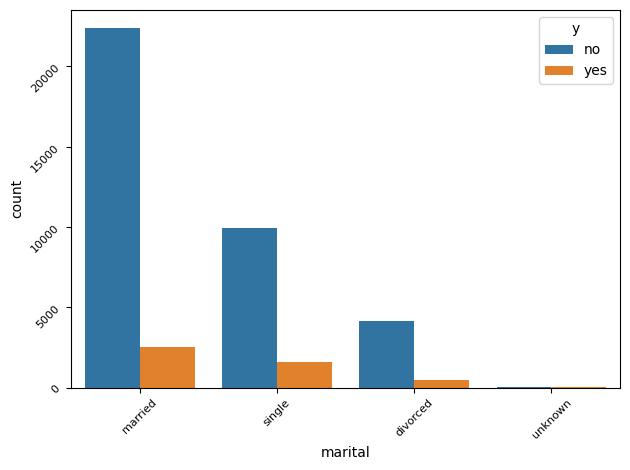

In [217]:
sns.countplot(data = total_data, x = "marital", hue = "y")
plt.tick_params(labelrotation=45, labelsize=8)

plt.tight_layout()

plt.show()

Again, there is no clear distinction accross the categories.

#### 4.3 Categorical-numerical
Let's see how categorical variables relate with the numerical ones.

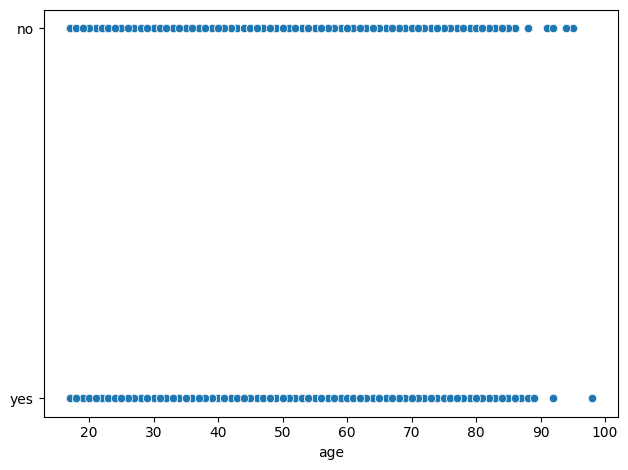

In [218]:
sns.scatterplot(data = total_data, x = "age", y = "y").set(ylabel = None)

plt.tight_layout()

plt.show()

It seems the age is evenly distributed among both categories.

#### 4.4 Correlation analysis

Let's take a look at how each variable correlates with each other whenever it makes sense:

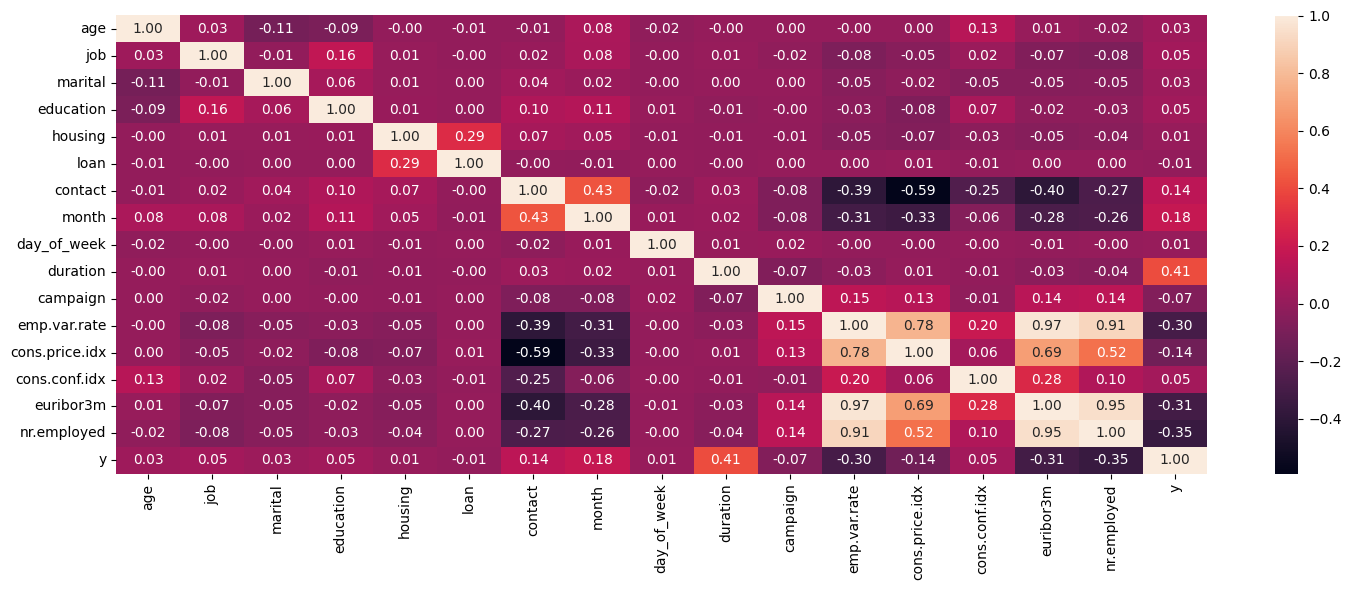

In [219]:
total_data_factorised = total_data.copy()
total_data_factorised["job"] = pd.factorize(total_data["job"])[0]
total_data_factorised["marital"] = pd.factorize(total_data["marital"])[0]
total_data_factorised["education"] = pd.factorize(total_data["education"])[0]
total_data_factorised["housing"] = pd.factorize(total_data["housing"])[0]
total_data_factorised["loan"] = pd.factorize(total_data["loan"])[0]
total_data_factorised["contact"] = pd.factorize(total_data["contact"])[0]
total_data_factorised["month"] = pd.factorize(total_data["month"])[0]
total_data_factorised["day_of_week"] = pd.factorize(total_data["day_of_week"])[0]
total_data_factorised["y"] = pd.factorize(total_data["y"])[0]

fig, axis = plt.subplots(figsize = (15, 6))

sns.heatmap(
    data=total_data_factorised[[
        "age", 
        "job", 
        "marital", 
        "education", 
        "housing",
        "loan",
        "contact",
        "month",
        "day_of_week",
        "duration",
        "campaign",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed",
        "y"
    ]].corr(), annot = True, fmt = ".2f"
)


plt.tight_layout()

plt.show()

As suspected, the day_of_week, education, housing, loan, marital and job variables have almost no correlation with any of the other variables, including the criterion. Let's drop them and take another look.

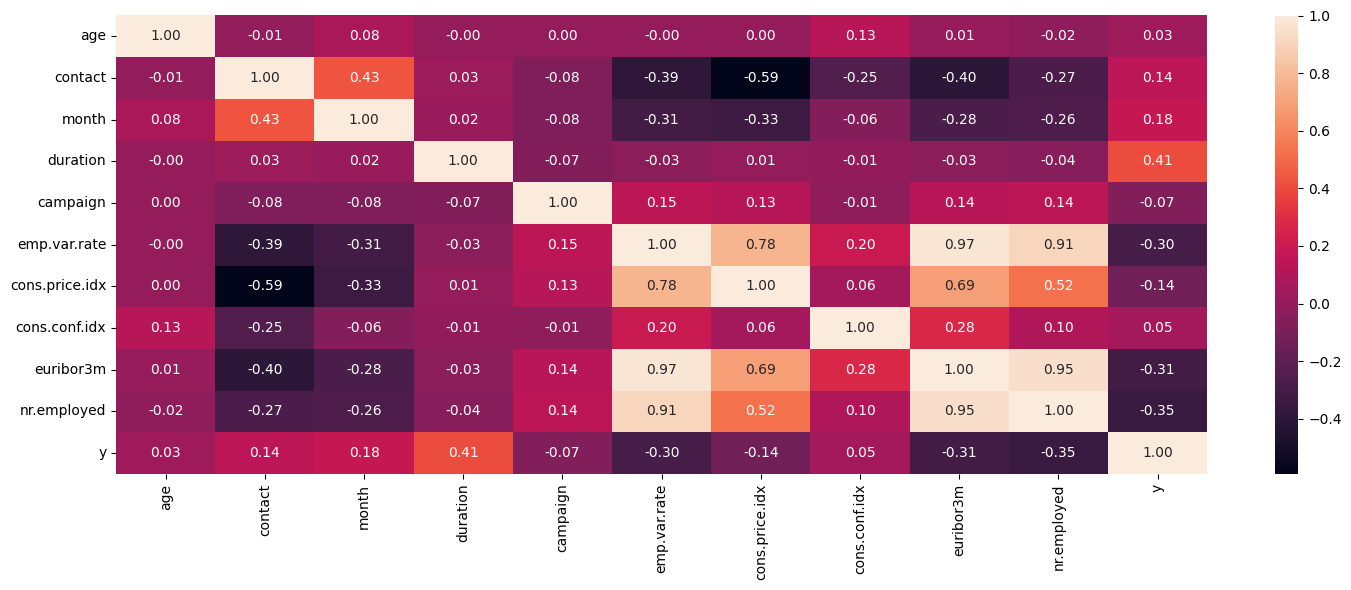

In [220]:
total_data.drop(['job'], axis=1, inplace=True)
total_data_factorised.drop(['job'], axis=1, inplace=True)
total_data.drop(['marital'], axis=1, inplace=True)
total_data_factorised.drop(['marital'], axis=1, inplace=True)
total_data.drop(['education'], axis=1, inplace=True)
total_data_factorised.drop(['education'], axis=1, inplace=True)
total_data.drop(['housing'], axis=1, inplace=True)
total_data_factorised.drop(['housing'], axis=1, inplace=True)
total_data.drop(['loan'], axis=1, inplace=True)
total_data_factorised.drop(['loan'], axis=1, inplace=True)
total_data.drop(['day_of_week'], axis=1, inplace=True)
total_data_factorised.drop(['day_of_week'], axis=1, inplace=True)

fig, axis = plt.subplots(figsize = (15, 6))

sns.heatmap(
    data=total_data_factorised[[
        "age", 
        "contact",
        "month",
        "duration",
        "campaign",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed",
        "y"
    ]].corr(), annot = True, fmt = ".2f"
)


plt.tight_layout()

plt.show()

Surprisingly, the age adds almost nothing to the model, so let's drop it as well.

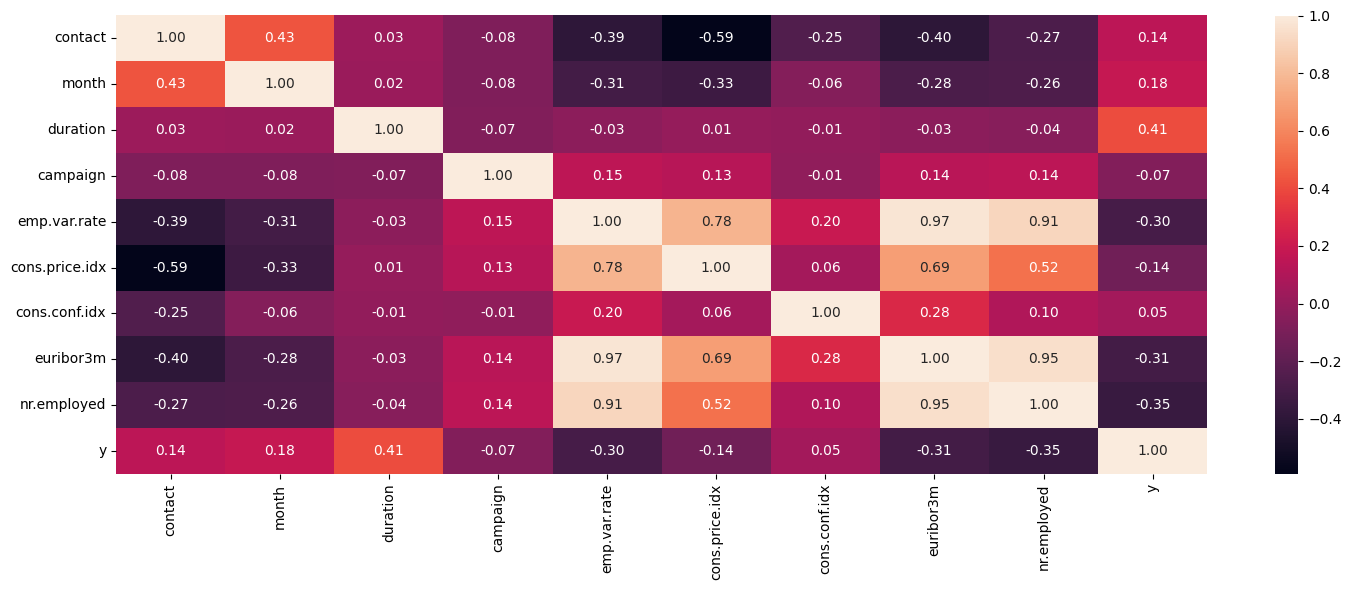

In [221]:
total_data.drop(['age'], axis=1, inplace=True)
total_data_factorised.drop(['age'], axis=1, inplace=True)

fig, axis = plt.subplots(figsize = (15, 6))

sns.heatmap(
    data=total_data_factorised[[
        "contact",
        "month",
        "duration",
        "campaign",
        "emp.var.rate",
        "cons.price.idx",
        "cons.conf.idx",
        "euribor3m",
        "nr.employed",
        "y"
    ]].corr(), annot = True, fmt = ".2f"
)


plt.tight_layout()

plt.show()

The remaining variables seem to have a significant weight in the data.

### 5. Feature engineering
#### 5.1 Missing value analysis.

Since we've already inspected the model for nulls and default values, we can safely assume the dataset doesn't have any missing values.

#### 5.2 Feature engineering
There are no apparent new features to consider.

#### 5.3 Outlier analysis
Now that we have a tidier dataset, we can proceed to study the outliers.

In [222]:
total_data_factorised.head()
total_data_factorised.describe()

,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,0.634748,2.250097,258.285010,2.567593,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.112654
std,0.481507,2.429079,259.279249,2.770014,1.570960,0.578840,4.628198,1.734447,72.251528,0.316173
min,0.000000,0.000000,0.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,102.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,1.000000,2.000000,180.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,3.000000,319.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,1.000000,9.000000,4918.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Taking into account only the numerival values, we can get the following insights:

- The min and the max duration are clearly outliers, because a contact cannot last 0s and the highest one is more than 10 times bigger than the 3rd quantile.
- There also seem to be outliers in the campaign variable due to its high max value

Let's see the rows in which duration = 0

In [223]:
total_data_factorised[total_data_factorised['duration'] == 0]['duration'].count()

4

Since they're very few we can remove them and measure again.

In [224]:
total_data_factorised = total_data_factorised[total_data_factorised['duration'] != 0]
total_data_factorised.describe()

,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,41184.000000,41184.000000,41184.000000,41184.000000,41184.00000,41184.000000,41184.000000,41184.000000,41184.000000,41184.000000
mean,0.634737,2.250049,258.310096,2.567381,0.08192,93.575686,-40.502508,3.621337,5167.037145,0.112665
std,0.481510,2.428978,259.279344,2.769895,1.57096,0.578849,4.628128,1.734438,72.252762,0.316187
min,0.000000,0.000000,1.000000,1.000000,-3.40000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,102.000000,1.000000,-1.80000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,1.000000,2.000000,180.000000,2.000000,1.10000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,3.000000,319.000000,3.000000,1.40000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,1.000000,9.000000,4918.000000,56.000000,1.40000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Let's get the limits for outliers:

In [225]:
# For duration
campaign_stats = total_data_factorised["duration"].describe()

campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 644.5 and -223.5, with an interquartile range of 217.0


Let's see how many values are above the upper limit.

In [226]:
print(total_data_factorised[total_data_factorised["duration"] > 1000].shape)

(956, 10)


After trial and error, we've decided to keep the upper bound above 1000 for the duration variable

Let's remove outliers

In [227]:
total_data = total_data[total_data["duration"] < 1000]
total_data_factorised = total_data_factorised[total_data_factorised["duration"] < 1000]
total_data_factorised.describe()

,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000,40223.000000
mean,0.634189,2.247371,232.184198,2.566392,0.080315,93.574978,-40.496313,3.619624,5166.960441,0.101186
std,0.481663,2.428167,187.952680,2.779735,1.571413,0.579107,4.629958,1.735001,72.255948,0.301578
min,0.000000,0.000000,1.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,101.000000,1.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,1.000000,2.000000,175.000000,2.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,3.000000,304.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,1.000000,9.000000,999.000000,56.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


Let's do the same for the campaign variable

In [228]:
# For campaign
campaign_stats = total_data_factorised["campaign"].describe()

campaign_iqr = campaign_stats["75%"] - campaign_stats["25%"]
upper_limit = campaign_stats["75%"] + 1.5 * campaign_iqr
lower_limit = campaign_stats["25%"] - 1.5 * campaign_iqr

print(f"The upper and lower limits for finding outliers are {round(upper_limit, 2)} and {round(lower_limit, 2)}, with an interquartile range of {round(campaign_iqr, 2)}")

The upper and lower limits for finding outliers are 6.0 and -2.0, with an interquartile range of 2.0


In [229]:
total_data_factorised[total_data_factorised["campaign"] > 12].shape

(558, 10)

After trial and error, we've decided to keep the upper bound above 12 for the duration variable

Let's remove outliers

In [230]:
total_data = total_data[total_data["campaign"] < 12]
total_data_factorised = total_data_factorised[total_data_factorised["campaign"] < 12]
total_data_factorised.describe()

,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
count,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000,39542.000000
mean,0.637601,2.258131,234.020737,2.308280,0.061062,93.568134,-40.495885,3.599735,5166.122455,0.102676
std,0.480699,2.441248,187.743482,1.808377,1.575328,0.579230,4.650746,1.740403,72.477421,0.303539
min,0.000000,0.000000,1.000000,1.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,0.000000,0.000000,103.000000,1.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,1.000000,2.000000,177.000000,2.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,0.000000
75%,1.000000,3.000000,306.000000,3.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,1.000000,9.000000,999.000000,11.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [231]:
total_data_factorised.shape

(39542, 10)

#### 5.4 Inference of new features

Let's look again at our dataset to see if we can infer any new features.

In [232]:
print(total_data.info())
total_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39546 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   contact         39546 non-null  object 
 1   month           39546 non-null  object 
 2   duration        39546 non-null  int64  
 3   campaign        39546 non-null  int64  
 4   emp.var.rate    39546 non-null  float64
 5   cons.price.idx  39546 non-null  float64
 6   cons.conf.idx   39546 non-null  float64
 7   euribor3m       39546 non-null  float64
 8   nr.employed     39546 non-null  float64
 9   y               39546 non-null  object 
dtypes: float64(5), int64(2), object(3)
memory usage: 3.3+ MB
None


,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,telephone,may,261,1,1.1,93.994,-36.4,4.857,5191.0,no
1,telephone,may,149,1,1.1,93.994,-36.4,4.857,5191.0,no
2,telephone,may,226,1,1.1,93.994,-36.4,4.857,5191.0,no
3,telephone,may,151,1,1.1,93.994,-36.4,4.857,5191.0,no
4,telephone,may,307,1,1.1,93.994,-36.4,4.857,5191.0,no


Deductions

#### 5.5 Feature scaling
Let's scale our features now

In [238]:
from sklearn.preprocessing import MinMaxScaler

num_variables = list(total_data_factorised.columns)
num_variables.remove('y')

scaler = MinMaxScaler()
norm_features = scaler.fit_transform(total_data_factorised[num_variables])
total_data_norm = pd.DataFrame(norm_features, index = total_data_factorised.index, columns = num_variables)
total_data_norm["y"] = total_data_factorised["y"]
total_data_norm.head()

,contact,month,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,0.0,0.0,0.260521,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
1,0.0,0.0,0.148297,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
2,0.0,0.0,0.225451,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
3,0.0,0.0,0.150301,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0
4,0.0,0.0,0.306613,0.0,0.9375,0.698753,0.60251,0.957379,0.859735,0


### 6. Feature Selection
Now that we've scaled the dataset, we can select the most relevant features.

In [272]:
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.model_selection import train_test_split

# We divide the dataset into training and test samples.
X = total_data_norm.drop("y", axis = 1)
y = total_data_norm["y"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

selection_model = SelectKBest(chi2, k = 3)
selection_model.fit(X_train, y_train)
ix = selection_model.get_support()
X_train_sel = pd.DataFrame(selection_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(selection_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

,duration,emp.var.rate,euribor3m
0,0.135271,0.9375,0.957606
1,0.279559,1.0000,0.981410
2,0.034068,1.0000,0.981410
3,0.128257,0.9375,0.957153
4,0.482966,0.9375,0.957833


Let's train the model

In [273]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

base_accuracy = accuracy_score(y_test, y_pred)
base_accuracy

0.9114932355544316